# Plot
Convenience class for data visualization.

In [1]:
%autosave 0

from tools import *
from plot import Plot

path = DATADIR / 'examples/energy.csv'

Autosave disabled


## build a Plot
Choose a matplotlib style, figure size, and resolution.

In [2]:
plot = Plot('bmh', dpi=100, figsize=(9, 5))
plot.params

{'axes': {'frame_on': False},
 'figure': {'clear': True,
  'dpi': 100,
  'edgecolor': None,
  'facecolor': None,
  'figsize': (9, 5),
  'frameon': False,
  'tight_layout': True},
 'legend': {'bbox_to_anchor': (1.05, 1),
  'borderaxespad': 0.0,
  'loc': 'upper left'}}

## load example data
Standardize and simplify for easier reading.

In [3]:
data = read_csv(path)

# Remove sneaky whitespace from column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert dates and consolidate columns
del data['total']
data['year'] = to_datetime(data['year'], format='%Y')
data['hydro'] = data.pop('conv._hydro') + data.pop('ps_hydro')
data['gas'] = data.pop('lfg') + data.pop('natural_gas')

# Sort and filter
data = data.set_index('year').sort_index()
data = data.loc['2000':, data.sum().nlargest(6).index]

afew(data)

,nuclear,coal,gas,hydro,petroleum,net_imports
year,,,,,,
2006-01-01,42224,20968.0,42460.0,28422.0,6778.0,18569.0
2005-01-01,42443,20598.0,32202.0,27583.0,24013.0,18115.0
2010-01-01,41870,13583.0,49624.0,25103.0,2005.0,26517.0
2001-01-01,40395,23432.0,38981.0,23152.0,16512.0,10628.0
2016-01-01,41638,1493.0,57541.0,27150.0,643.0,26117.0


In [4]:
color = 'green black yellow blue red grey'.split()

## area

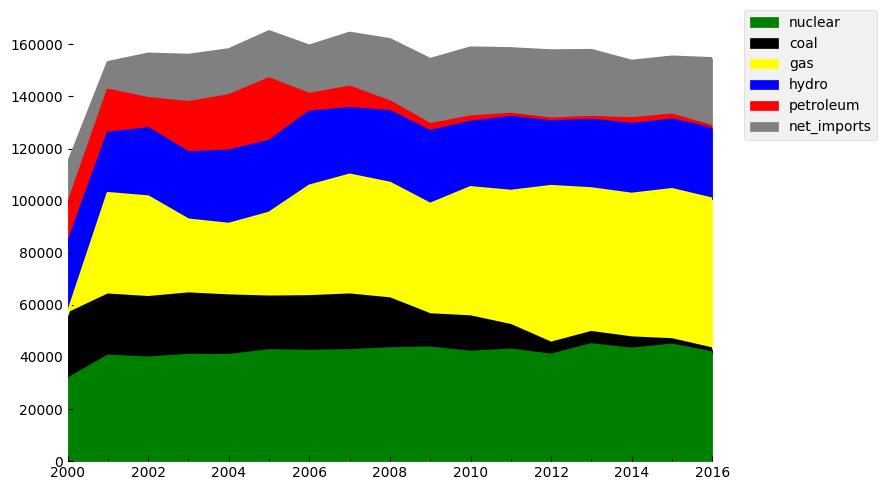

In [5]:
plot.area(data, color=color)

## bar, barh

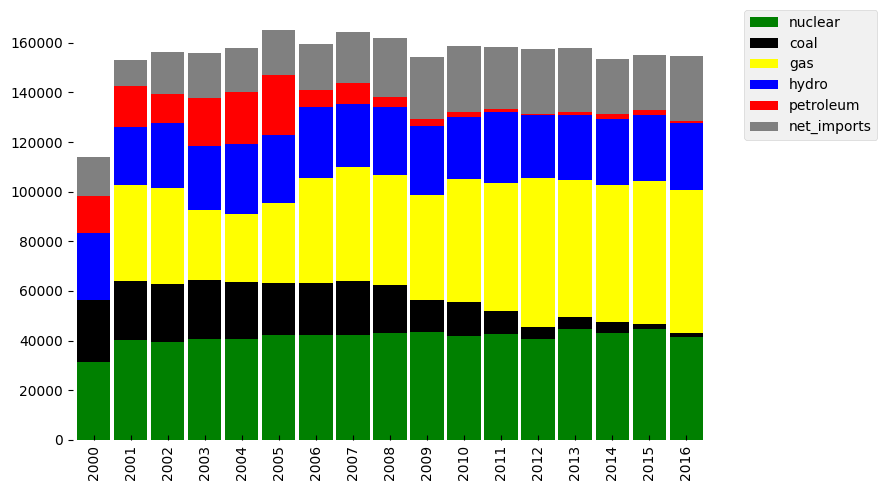

In [6]:
plot.bar(data.set_index(data.index.year), color=color)

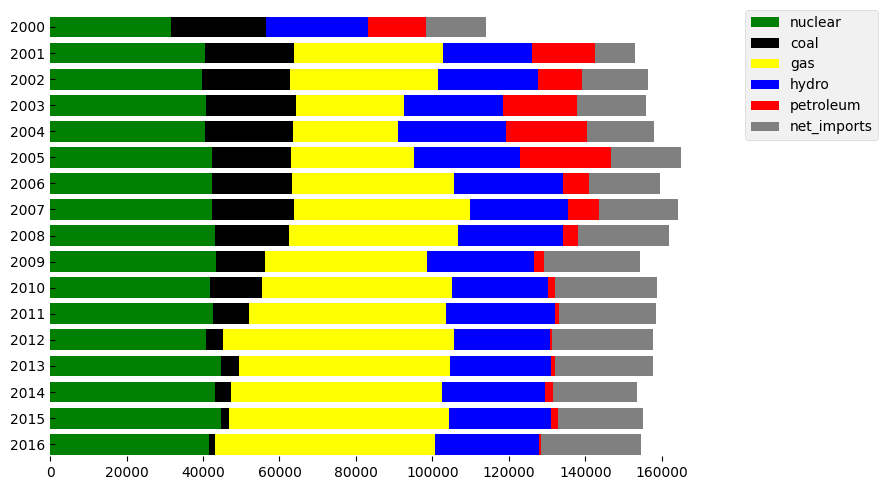

In [7]:
plot.barh(data.set_index(data.index.year), color=color)

## box, boxh

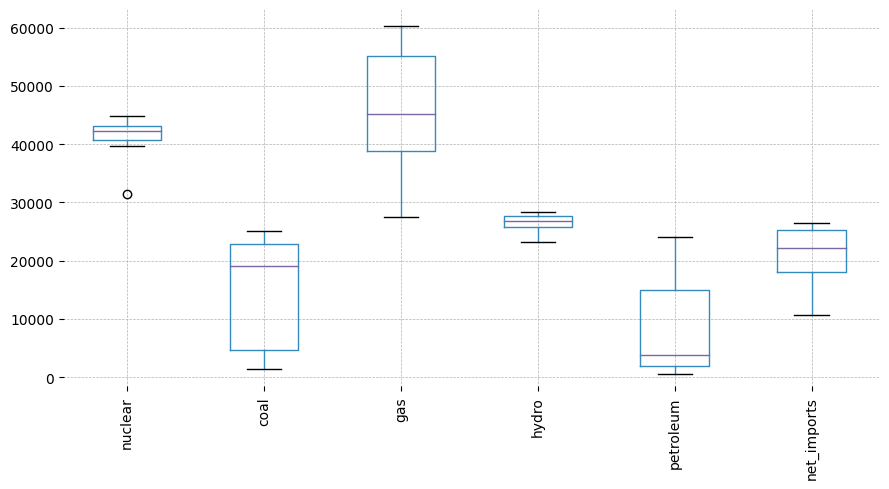

In [8]:
plot.box(data)

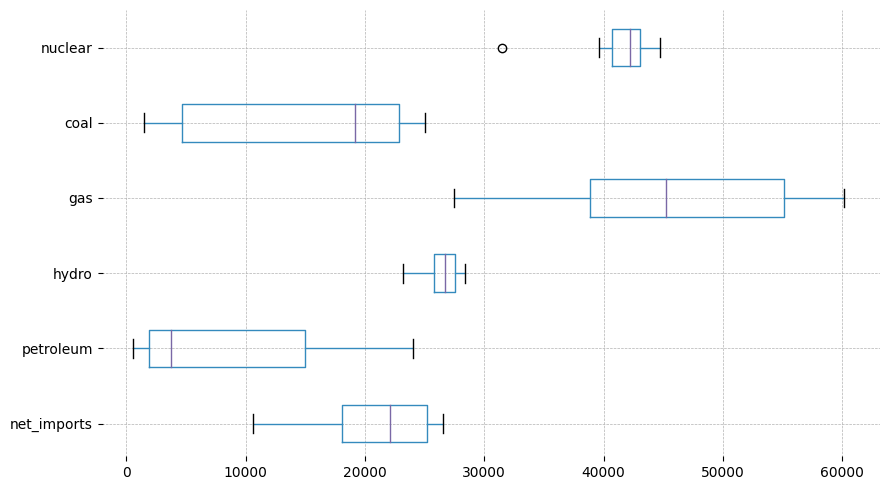

In [9]:
plot.boxh(data)

## density

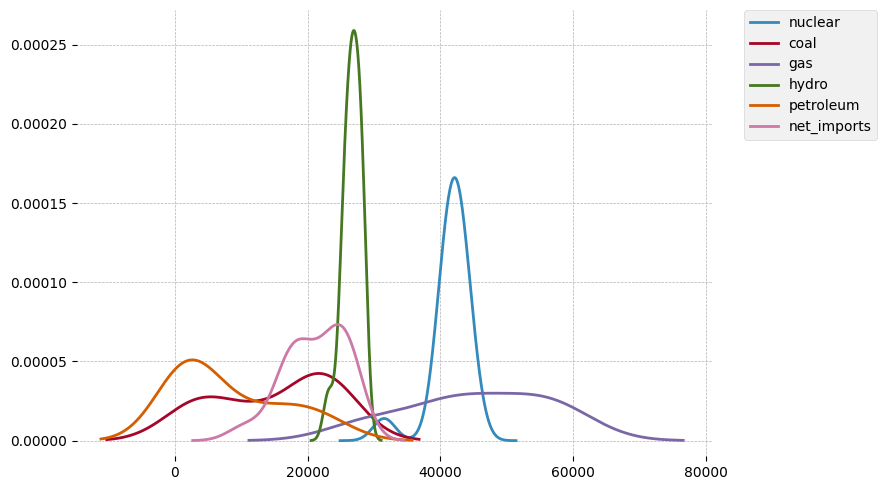

In [10]:
plot.density(data)

## heat

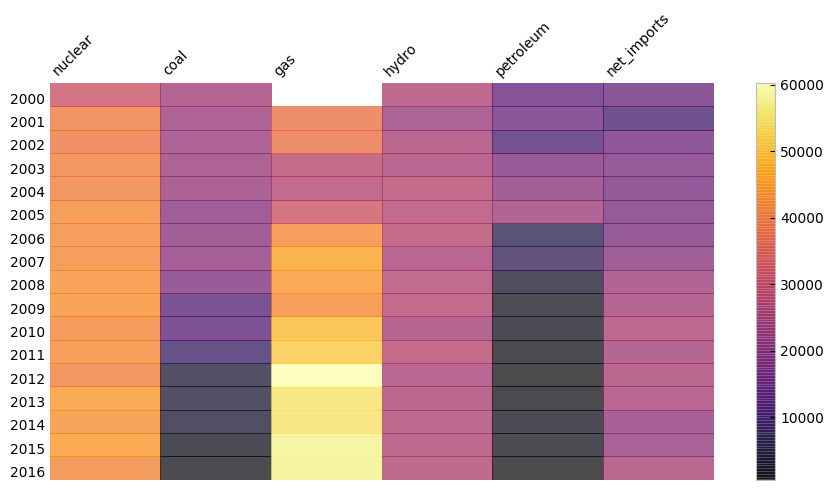

In [11]:
plot.heat(data.set_index(data.index.year), colorbar=True)

## hist

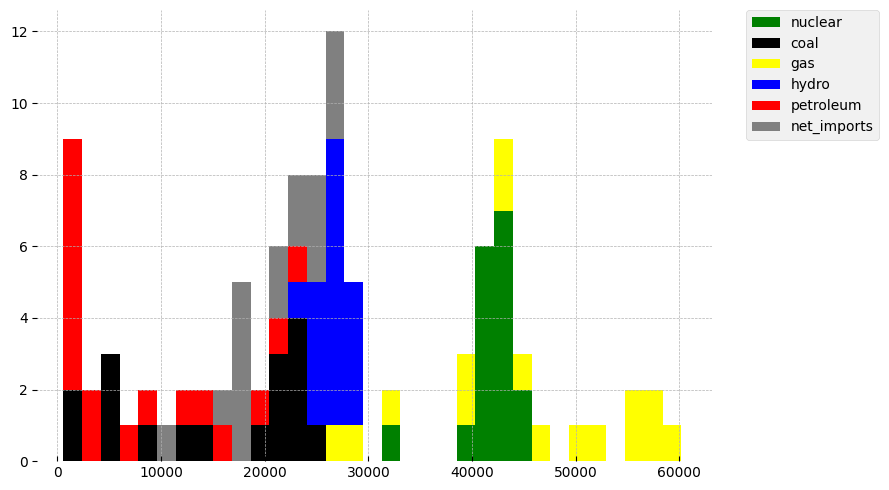

In [12]:
plot.hist(data, color=color)

## line

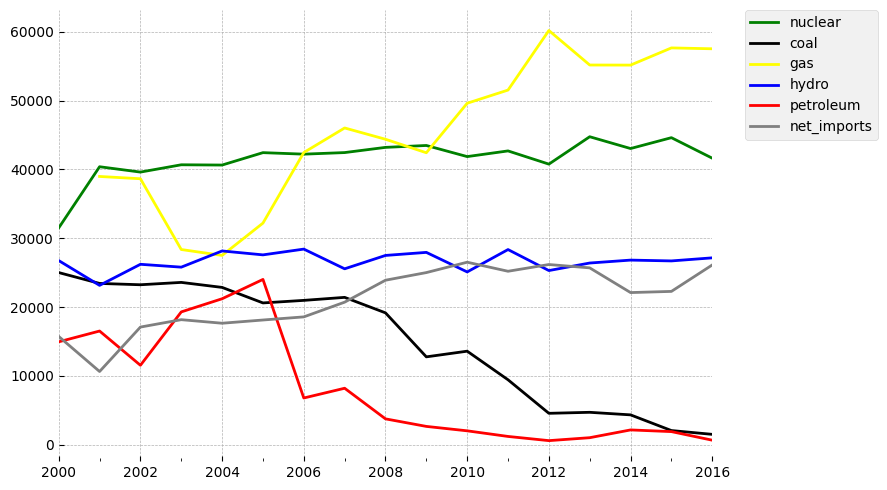

In [13]:
plot.line(data, color=color)

## scatter

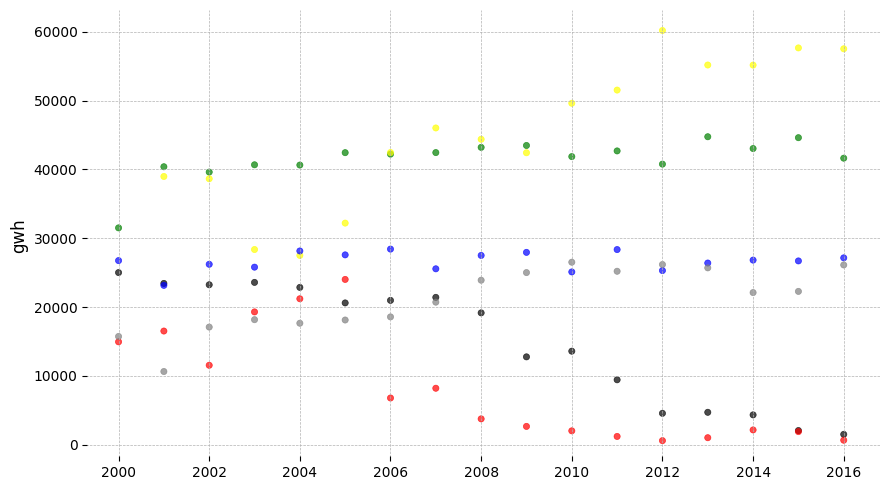

In [14]:
points = data.stack().reset_index()
points.columns = 'year source gwh'.split()
points['year'] = points['year'].dt.year
points['color'] = points['source'].map(dict(zip(data.columns, color)))
points = points['year gwh color'.split()]

plot.scatter(points, ylabel='gwh')

## help

In [15]:
help(Plot)

Help on class Plot in module plot:

class Plot(builtins.object)
 |  Plot(style='bmh', **kwargs)
 |  
 |  Plot maker for pandas.DataFrame or .Series inputs.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, data, **kwargs)
 |      Call self as a function.
 |  
 |  __init__(self, style='bmh', **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  area(self, data, **kwargs)
 |      AxesSubplot: Area plot for each column.
 |  
 |  axes(self)
 |  
 |  bar(self, data, **kwargs)
 |      AxesSubplot: Bar plot for each column.
 |  
 |  barh(self, data, **kwargs)
 |      AxesSubplot: Horizontal bar plot for each column.
 |  
 |  box(self, data, **kwargs)
 |      AxesSubplot: Box plot for each column.
 |  
 |  boxh(self, data, **kwargs)
 |      AxesSubplot: Horizontal box plot for each column.
 |  
 |  density(self, data, **kwargs)
 |      AxesSubplot: Probability density estimate for each column.
 |  
 |  